# CNO Fraction in the Sun

Figure 5.9 from Chapter 5 of Stellar Structure & Evolution by Pinsonneault & Ryden, Cambridge University Press.

Plot of the <sup>12</sup>C, <sup>14</sup>N, and <sup>16</sup>O fractions as a function of mass fraction 
in the BP2004 standard non-rotating solar model. Data are from Bahcall and Pinsonneault 2004, astro-ph/0402114.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig5_9.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data

Read in two columns from the BP2004 model file:
 * M/Msun = enclosed mass fraction in units of M<sub>sun</sub>
 * C12 = <sup>12</sup>C mass fraction
 * N14 = <sup>14</sup>N mass fraction
 * O16 = <sup>16</sup>O mass fraction


In [3]:
# BP2004 Standard Solar Model

dataFile = 'BP2004_Standard.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
massFrac = np.array(data['M/Msun']) 
c12 = np.array(data['C12'])
n14 = np.array(data['N14'])
o16 = np.array(data['O16'])

minM = 0 # M/Msun
maxM = 1.05 
minX = 5.0e-6
maxX = 0.02

## Figure 5.9

Plot is semi-log.  Plot as follows:
 * C12 - solid
 * N14 - dotted
 * O16 - dashed

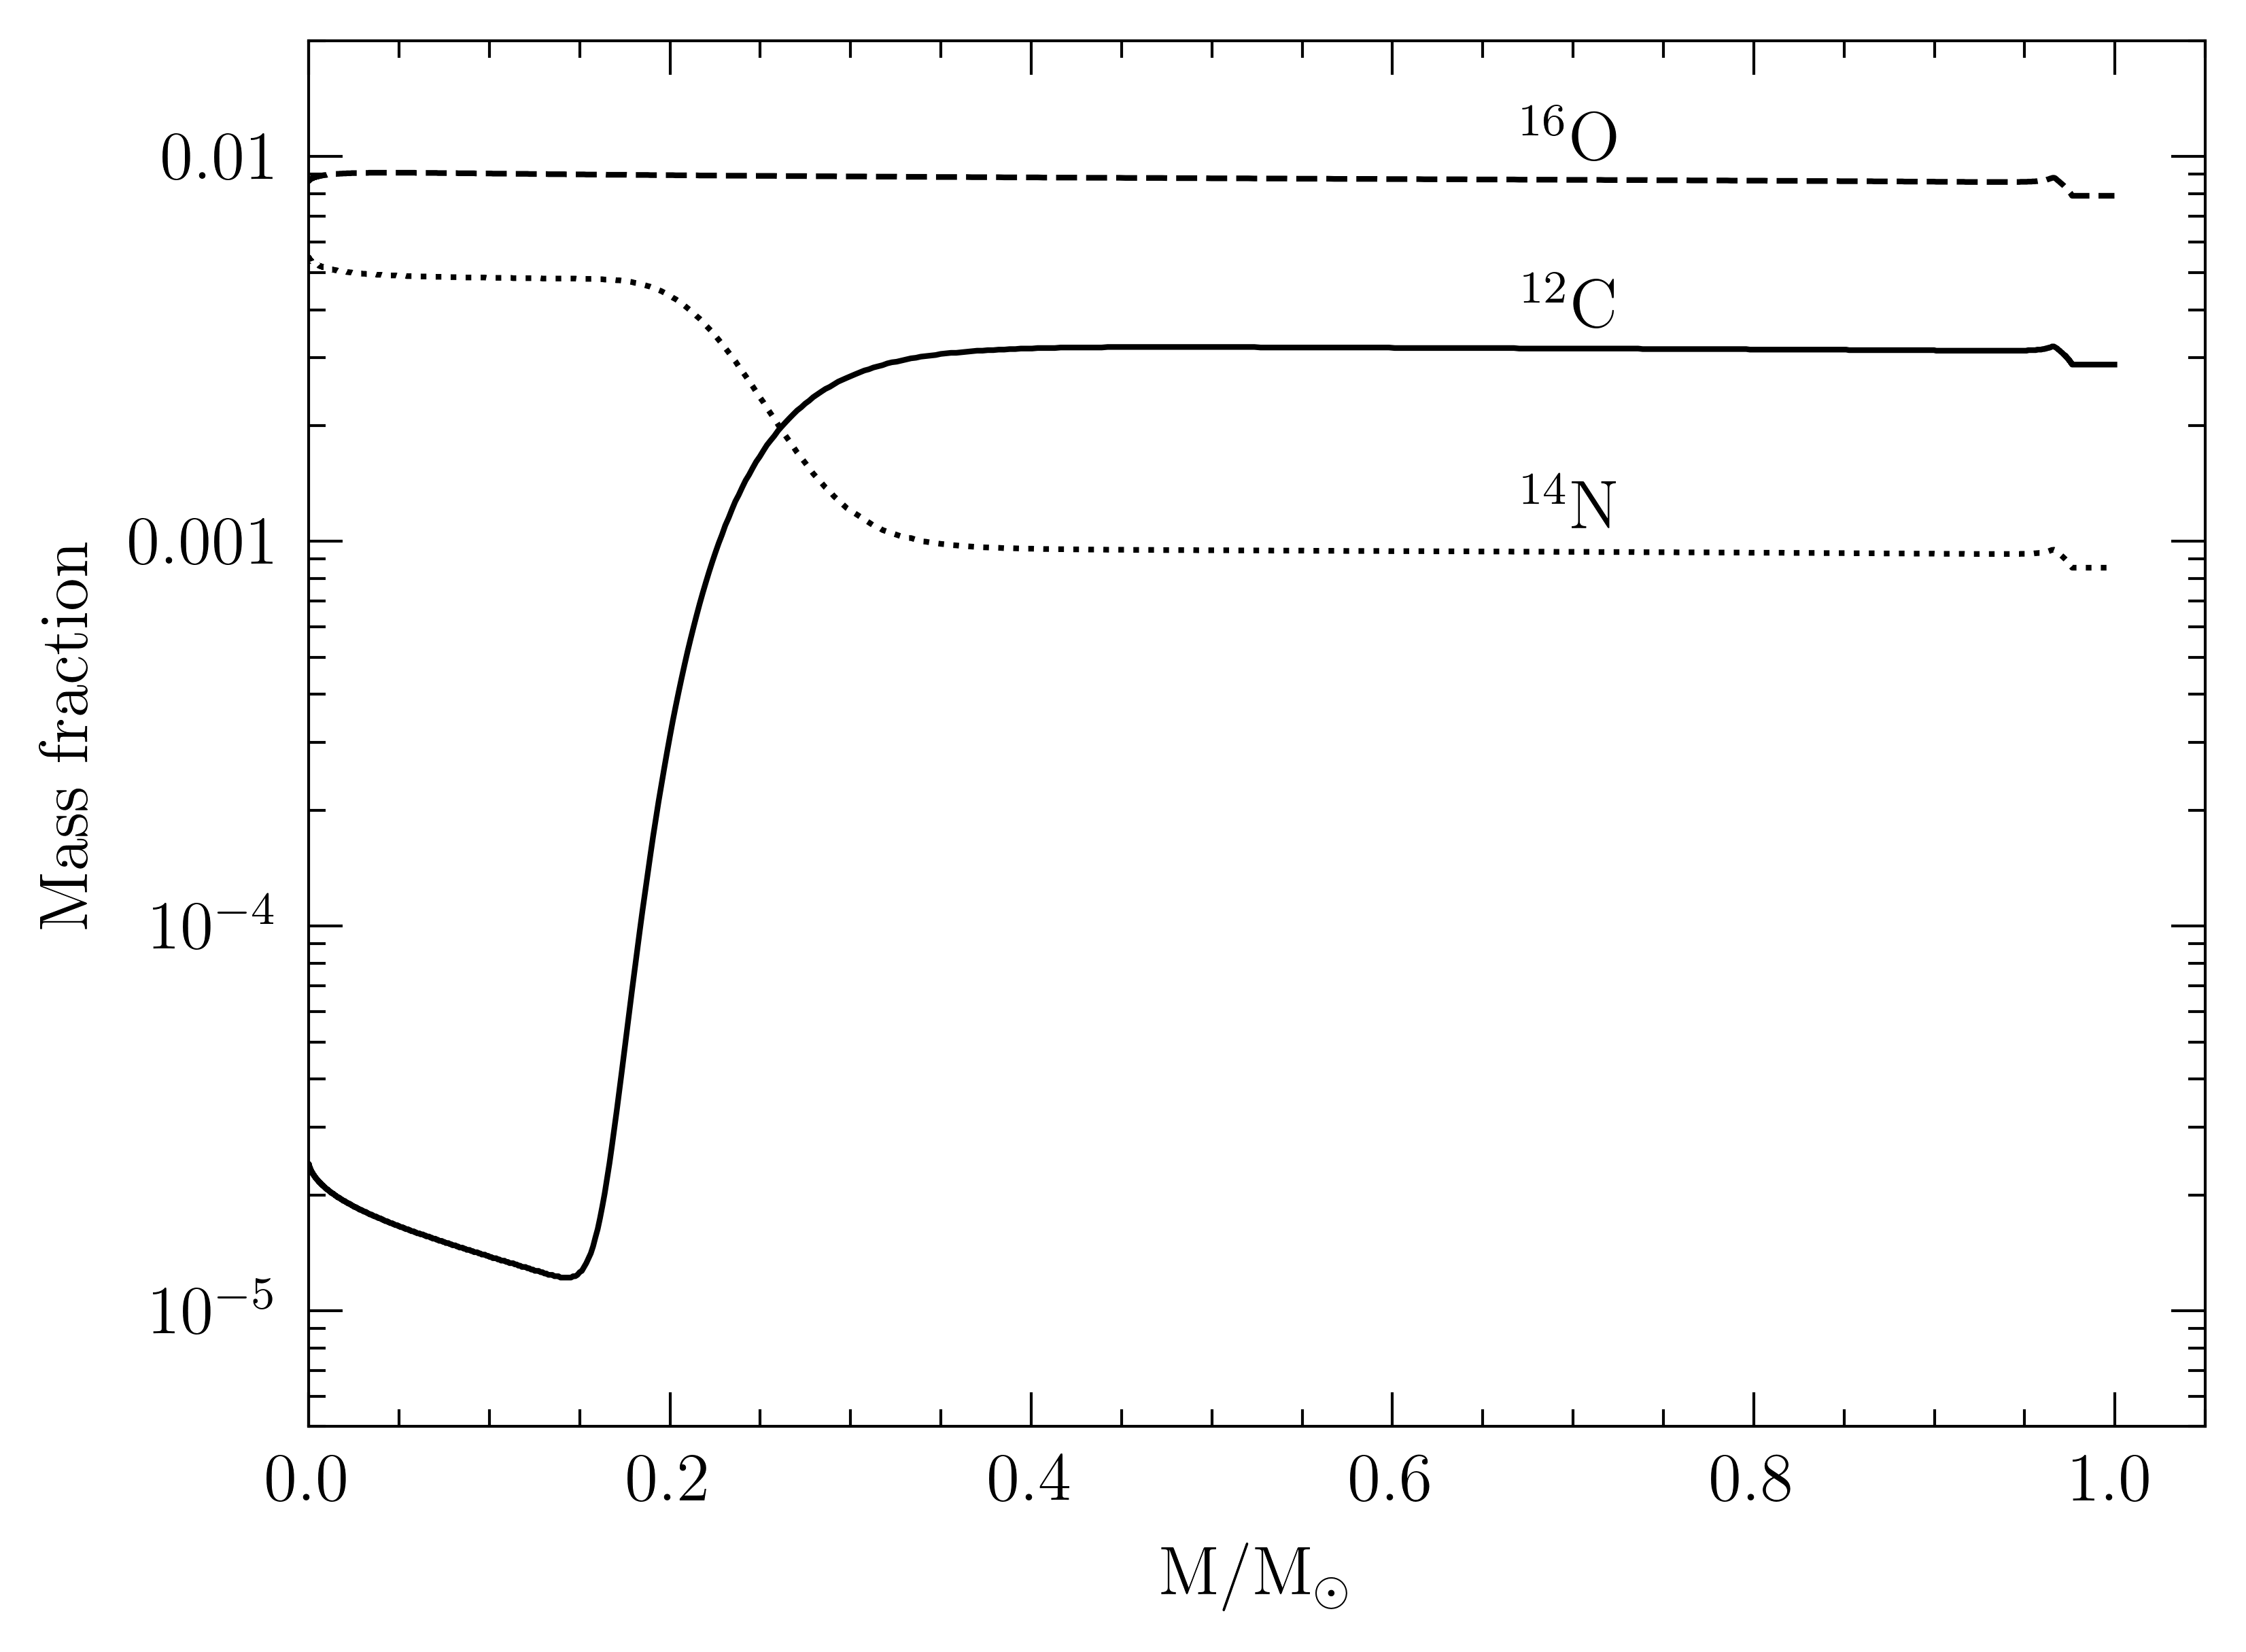

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

ax.set_xlim(minM,maxM)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_xlabel(r'M/M$_{\odot}$',fontsize=axisFontSize)

ax.set_ylim(minX,maxX)
ax.set_yscale('log')
ax.set_ylabel(r'Mass fraction',fontsize=axisFontSize)
ax.set_yticks([1e-5,1e-4,1e-3,1e-2])
ax.set_yticklabels([r'10$^{-5}$','10$^{-4}$','0.001','0.01'])

ax.plot(massFrac,c12,'-',color='black',lw=1)
ax.text(0.7,0.0033,r'$^{12}$C',ha='center',va='bottom',fontsize=axisFontSize)

ax.plot(massFrac,n14,':',color='black',lw=1)
ax.text(0.7,0.001,r'$^{14}$N',ha='center',va='bottom',fontsize=axisFontSize)

ax.plot(massFrac,o16,'--',color='black',lw=1)
ax.text(0.7,0.009,r'$^{16}$O',ha='center',va='bottom',fontsize=axisFontSize)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')